In [134]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  5 12:59:44 2021

@author: LK
"""


import bt
import talib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import Strategies
from methods import get_indicator_signal, plot_bband_dema

"""

Strategy based on own Signals

"""

#Methods work currently only for one asset at a time
asset = 'BTC-USD'

# 2014-09-16 to 2017-12-31

# Specify
start = '16-09-2014'
end = '31-12-2017'

train_start = '16-09-2014'
train_end = '31-12-2017'

test_start = '01-01-2018'
test_end = '31-12-2019'


train_data = bt.get(asset, start=train_start, end=train_end)
test_data = bt.get(asset, start=test_start, end=test_end)


# BBands
t_bbands = 80
nbdevup = 1
nbdevdn = 1

# DEMA
fast_range = np.arange(20,30, 1)
slow_range = np.arange(90,130,1)
t_fast = 20
t_slow = 100

strat_dict = {}

In [3]:
for t_fast in fast_range:
    for t_slow in slow_range:
        # Get Indicators and Signals 
        indicators,signals = get_indicator_signal(asset=asset,start=start,end=end,t_fast=t_fast,t_slow=t_slow,t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)
        
#         temp_df = bt.merge(indicators,signals)
        
        # Plot the data
#         bband_dema_fig = plot_bband_dema(asset=asset,indicators=indicators,signals=signals)

        # Get the target weights of the DEMA Strategy

        target_weight = pd.DataFrame(signals['DEMA'])
        target_weight.columns = [asset]

        # Create DEMA Strategy

        dema_crossover = bt.Strategy('DEMA_Crossover', 
                                   [bt.algos.WeighTarget(target_weight),
                                    bt.algos.Rebalance()],
                                   )

        #Create and run Backtest

        backtest = bt.Backtest(dema_crossover, pd.DataFrame(indicators[asset]))
        run = bt.run(backtest)
        
        strat_dict[f'{t_fast}_{t_slow}_strategy'] = run

    
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 100  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

# plt.show()

In [4]:
max_return = 0.0
max_return_key = ''
for key in strat_dict:
    current_key_total_return = float(strat_dict[key].stats.loc['total_return'])
    if current_key_total_return > max_return:
        max_return = current_key_total_return
        max_return_key = key
        
# print(float(current_key_total_return))

In [5]:
print(max_return)
print(max_return_key)

5.734961759277349
28_126_strategy


In [6]:
""" 

DEMA-Strategy
- Go long if Fast DEMA > Slow DEMA
- Go short if Fast DEMA < Slow DEMA

"""

t_fast = 28
t_slow = 126

# Get the target weights of the DEMA Strategy

indicators,signals = get_indicator_signal(asset=asset,start=train_start, end=train_end, t_fast=t_fast, t_slow=t_slow, t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

#         temp_df = bt.merge(indicators,signals)

# Plot the data
#         bband_dema_fig = plot_bband_dema(asset=asset,indicators=indicators,signals=signals)

# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['DEMA'])
target_weight.columns = [asset]

# Create DEMA Strategy

dema_crossover = bt.Strategy('DEMA_Crossover', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

#Create and run Backtest

backtest = bt.Backtest(dema_crossover, pd.DataFrame(indicators[asset]))
train_dema_run = bt.run(backtest)

In [7]:
indicators,signals = get_indicator_signal(asset=asset,start=test_start, end=test_end, t_fast=t_fast, t_slow=t_slow, t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

#         temp_df = bt.merge(indicators,signals)

# Plot the data
#         bband_dema_fig = plot_bband_dema(asset=asset,indicators=indicators,signals=signals)

# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['DEMA'])
target_weight.columns = [asset]

# Create DEMA Strategy

dema_crossover = bt.Strategy('DEMA_Crossover', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

#Create and run Backtest

test_dema_backtest = bt.Backtest(dema_crossover, pd.DataFrame(indicators[asset]))
test_dema_run = bt.run(backtest)

In [8]:
"""

BBANDS Strategy
- Go long if price goes below Upperband

"""


# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['BBAND'])
target_weight.columns = [asset]


bbands = bt.Strategy('BDands_Crossover_Up', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

backtest = bt.Backtest(bbands, pd.DataFrame(indicators[asset]))

final_dema_run = bt.run(backtest)

<AxesSubplot:title={'center':'Equity Progression'}>

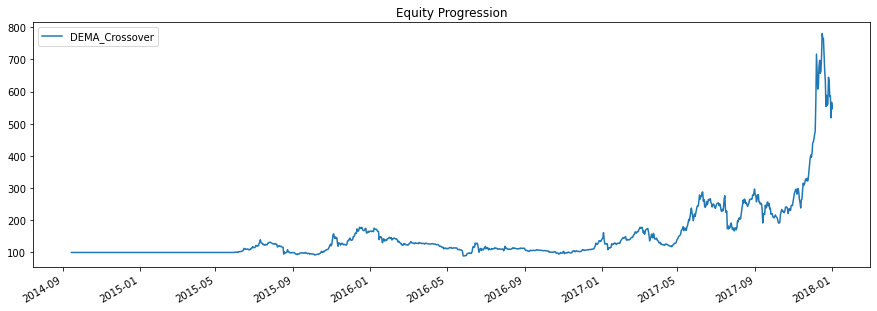

In [9]:
# Display results
run.plot()

In [10]:

# BBands
t_bbands = 80
nbdevup = 1
nbdevdn = 1

t_bbands_range = np.arange(60, 200, 5)
nbdevup_range = np.arange(0.8, 2, 0.1)
nbdevdn_range = np.arange(0.8, 2, 0.1)



bbands_result_dict = {}

for t_bbands in t_bbands_range:
    for nbdevup in nbdevup_range:
        for nbdevdn in nbdevdn_range:
            # Get Indicators and Signals 
            indicators,signals = get_indicator_signal(asset=asset,start=start,end=end,t_fast=t_fast,t_slow=t_slow,t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

            target_weight = pd.DataFrame(signals['BBAND'])
            target_weight.columns = [asset]


            bbands = bt.Strategy('BDands_Crossover_Up', 
                                       [bt.algos.WeighTarget(target_weight),
                                        bt.algos.Rebalance()],
                                       )

            backtest_bbands = bt.Backtest(bbands, pd.DataFrame(indicators[asset]))
            


            run = bt.run(backtest_bbands)
            
            bbands_result_dict[f'{nbdevdn}_{nbdevup}_{t_bbands}_strategy'] = run
    print(t_bbands)
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 100  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)
            

60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195


In [11]:
max_return = 0.0
max_return_key = ''
for key in bbands_result_dict:
    current_key_total_return = float(bbands_result_dict[key].stats.loc['total_return'])
    if current_key_total_return > max_return:
        max_return = current_key_total_return
        max_return_key = key
        
print(max_return)
print(max_return_key)

22.282565568847655
0.8_1.0_100_strategy


In [12]:
for key in bbands_result_dict:
    print(key)
    print(bbands_result_dict[key].stats.loc['total_return'])
    print('_____________________')

0.8_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
0.9_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.0_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.1_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.2_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.2999999999999998_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.4_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.5_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.69999

BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________
1.2_1.5999999999999999_60_strategy
BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5999999999999999_60_strategy
BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________
1.4_1.5999999999999999_60_strategy
BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________
1.5_1.5999999999999999_60_strategy
BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5999999999999999_60_strategy
BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5999999999999999_60_strategy
BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5999999999999999_60_strategy
BDands_Crossover_Up    15.7964
Name: total_return, dtype: object
_____________________

_____________________
1.0_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.1_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.2_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.4_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.5_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.2_65_strategy
BDands_Crossover_Up    10.9083
Name: total

_____________________
1.5_1.7999999999999998_65_strategy
BDands_Crossover_Up    9.7262
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.7999999999999998_65_strategy
BDands_Crossover_Up    9.7262
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.7999999999999998_65_strategy
BDands_Crossover_Up    9.7262
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.7999999999999998_65_strategy
BDands_Crossover_Up    9.7262
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.7999999999999998_65_strategy
BDands_Crossover_Up    9.7262
Name: total_return, dtype: object
_____________________
0.8_1.8999999999999997_65_strategy
BDands_Crossover_Up    7.67812
Name: total_return, dtype: object
_____________________
0.9_1.8999999999999997_65_strategy
BDands_Crossover_Up    7.67812
Name: total_return, dtype: object
_____________________
1.0_1.8999999999999997_65_strategy
BDands_Crossover_Up    7.67812
Nam

BDands_Crossover_Up    13.9559
Name: total_return, dtype: object
_____________________
1.5_1.5_70_strategy
BDands_Crossover_Up    13.9559
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5_70_strategy
BDands_Crossover_Up    13.9559
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5_70_strategy
BDands_Crossover_Up    13.9559
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5_70_strategy
BDands_Crossover_Up    13.9559
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5_70_strategy
BDands_Crossover_Up    13.9559
Name: total_return, dtype: object
_____________________
0.8_1.5999999999999999_70_strategy
BDands_Crossover_Up    13.3671
Name: total_return, dtype: object
_____________________
0.9_1.5999999999999999_70_strategy
BDands_Crossover_Up    13.3671
Name: total_return, dtype: object
_____________________
1.0_1.5999999999999999_70_strategy
BDands_Crossover_Up    13.3671
Name: to

BDands_Crossover_Up    10.7568
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.2999999999999998_75_strategy
BDands_Crossover_Up    10.7568
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.2999999999999998_75_strategy
BDands_Crossover_Up    10.7568
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.2999999999999998_75_strategy
BDands_Crossover_Up    10.7568
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.2999999999999998_75_strategy
BDands_Crossover_Up    10.7568
Name: total_return, dtype: object
_____________________
0.8_1.4_75_strategy
BDands_Crossover_Up    9.58203
Name: total_return, dtype: object
_____________________
0.9_1.4_75_strategy
BDands_Crossover_Up    9.58203
Name: total_return, dtype: object
_____________________
1.0_1.4_75_strategy
BDands_Crossover_Up    9.58203
Name: total_return, dtype: object
_____________________
1.1_1.4_75_strategy
BDands_Crossover_Up    9

_____________________
1.6999999999999997_0.9_80_strategy
BDands_Crossover_Up    13.9782
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.9_80_strategy
BDands_Crossover_Up    13.9782
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.9_80_strategy
BDands_Crossover_Up    13.9782
Name: total_return, dtype: object
_____________________
0.8_1.0_80_strategy
BDands_Crossover_Up    11.3987
Name: total_return, dtype: object
_____________________
0.9_1.0_80_strategy
BDands_Crossover_Up    11.3987
Name: total_return, dtype: object
_____________________
1.0_1.0_80_strategy
BDands_Crossover_Up    11.3987
Name: total_return, dtype: object
_____________________
1.1_1.0_80_strategy
BDands_Crossover_Up    11.3987
Name: total_return, dtype: object
_____________________
1.2_1.0_80_strategy
BDands_Crossover_Up    11.3987
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.0_80_strategy
BDands_Crossover_Up    11.3987
Name: total

Name: total_return, dtype: object
_____________________
0.8_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: total_return, dtype: object
_____________________
0.9_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: total_return, dtype: object
_____________________
1.0_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: total_return, dtype: object
_____________________
1.1_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: total_return, dtype: object
_____________________
1.2_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: total_return, dtype: object
_____________________
1.4_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: total_return, dtype: object
_____________________
1.5_1.5999999999999999_80_strategy
BDands_Crossover_Up    10.3203
Name: tot

Name: total_return, dtype: object
_____________________
1.2999999999999998_1.1_85_strategy
BDands_Crossover_Up    9.3244
Name: total_return, dtype: object
_____________________
1.4_1.1_85_strategy
BDands_Crossover_Up    9.3244
Name: total_return, dtype: object
_____________________
1.5_1.1_85_strategy
BDands_Crossover_Up    9.3244
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.1_85_strategy
BDands_Crossover_Up    9.3244
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.1_85_strategy
BDands_Crossover_Up    9.3244
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.1_85_strategy
BDands_Crossover_Up    9.3244
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_85_strategy
BDands_Crossover_Up    9.3244
Name: total_return, dtype: object
_____________________
0.8_1.2_85_strategy
BDands_Crossover_Up    12.6433
Name: total_return, dtype: object
_____________________
0.9_1.2_85_strategy


BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.0_1.7999999999999998_85_strategy
BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.1_1.7999999999999998_85_strategy
BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.2_1.7999999999999998_85_strategy
BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.7999999999999998_85_strategy
BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.4_1.7999999999999998_85_strategy
BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.5_1.7999999999999998_85_strategy
BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.7999999999999998_85_strategy
BDands_Crossover_Up    11.173
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.7999999999999998

0.9_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.0_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.1_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.2_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.4_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.5_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.4_90_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
______________

0.9_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.0_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.1_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.2_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.4_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.5_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.1_95_strategy
BDands_Crossover_Up    11.5522
Name: total_return, dtype: object
______________

Name: total_return, dtype: object
_____________________
1.2999999999999998_1.7999999999999998_95_strategy
BDands_Crossover_Up    8.57812
Name: total_return, dtype: object
_____________________
1.4_1.7999999999999998_95_strategy
BDands_Crossover_Up    8.57812
Name: total_return, dtype: object
_____________________
1.5_1.7999999999999998_95_strategy
BDands_Crossover_Up    8.57812
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.7999999999999998_95_strategy
BDands_Crossover_Up    8.57812
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.7999999999999998_95_strategy
BDands_Crossover_Up    8.57812
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.7999999999999998_95_strategy
BDands_Crossover_Up    8.57812
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.7999999999999998_95_strategy
BDands_Crossover_Up    8.57812
Name: total_return, dtype: object
_____________________
0.8_1.899999999

_____________________
0.8_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
0.9_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
1.0_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
1.1_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
1.2_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
1.4_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
1.5_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5_100_strategy
BDands_Crossover_Up    10.2995
Name: total_return, dtype: objec

Name: total_return, dtype: object
_____________________
1.6999999999999997_1.1_105_strategy
BDands_Crossover_Up    14.2336
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.1_105_strategy
BDands_Crossover_Up    14.2336
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_105_strategy
BDands_Crossover_Up    14.2336
Name: total_return, dtype: object
_____________________
0.8_1.2_105_strategy
BDands_Crossover_Up    10.8944
Name: total_return, dtype: object
_____________________
0.9_1.2_105_strategy
BDands_Crossover_Up    10.8944
Name: total_return, dtype: object
_____________________
1.0_1.2_105_strategy
BDands_Crossover_Up    10.8944
Name: total_return, dtype: object
_____________________
1.1_1.2_105_strategy
BDands_Crossover_Up    10.8944
Name: total_return, dtype: object
_____________________
1.2_1.2_105_strategy
BDands_Crossover_Up    10.8944
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2_105_strategy

Name: total_return, dtype: object
_____________________
1.5999999999999999_1.8999999999999997_105_strategy
BDands_Crossover_Up    7.09453
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.8999999999999997_105_strategy
BDands_Crossover_Up    7.09453
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.8999999999999997_105_strategy
BDands_Crossover_Up    7.09453
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.8999999999999997_105_strategy
BDands_Crossover_Up    7.09453
Name: total_return, dtype: object
_____________________
0.8_0.8_110_strategy
BDands_Crossover_Up    12.1826
Name: total_return, dtype: object
_____________________
0.9_0.8_110_strategy
BDands_Crossover_Up    12.1826
Name: total_return, dtype: object
_____________________
1.0_0.8_110_strategy
BDands_Crossover_Up    12.1826
Name: total_return, dtype: object
_____________________
1.1_0.8_110_strategy
BDands_Crossover_Up    12.1826
Name: total_retu

_____________________
1.6999999999999997_1.4_110_strategy
BDands_Crossover_Up    10.6413
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.4_110_strategy
BDands_Crossover_Up    10.6413
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.4_110_strategy
BDands_Crossover_Up    10.6413
Name: total_return, dtype: object
_____________________
0.8_1.5_110_strategy
BDands_Crossover_Up    12.0006
Name: total_return, dtype: object
_____________________
0.9_1.5_110_strategy
BDands_Crossover_Up    12.0006
Name: total_return, dtype: object
_____________________
1.0_1.5_110_strategy
BDands_Crossover_Up    12.0006
Name: total_return, dtype: object
_____________________
1.1_1.5_110_strategy
BDands_Crossover_Up    12.0006
Name: total_return, dtype: object
_____________________
1.2_1.5_110_strategy
BDands_Crossover_Up    12.0006
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5_110_strategy
BDands_Crossover_Up    12.0006
Na

BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.4_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.5_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
0.8_1.2_115_strategy
BDands_Crossover_Up    11.6339
Name: total_return, dtype: obj

Name: total_return, dtype: object
_____________________
1.1_1.8999999999999997_115_strategy
BDands_Crossover_Up    5.20263
Name: total_return, dtype: object
_____________________
1.2_1.8999999999999997_115_strategy
BDands_Crossover_Up    5.20263
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.8999999999999997_115_strategy
BDands_Crossover_Up    5.20263
Name: total_return, dtype: object
_____________________
1.4_1.8999999999999997_115_strategy
BDands_Crossover_Up    5.20263
Name: total_return, dtype: object
_____________________
1.5_1.8999999999999997_115_strategy
BDands_Crossover_Up    5.20263
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.8999999999999997_115_strategy
BDands_Crossover_Up    5.20263
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.8999999999999997_115_strategy
BDands_Crossover_Up    5.20263
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.8999999999999997_

Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.4_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.5_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
0.8_1.69

1.5999999999999999_1.1_125_strategy
BDands_Crossover_Up    14.4582
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.1_125_strategy
BDands_Crossover_Up    14.4582
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.1_125_strategy
BDands_Crossover_Up    14.4582
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_125_strategy
BDands_Crossover_Up    14.4582
Name: total_return, dtype: object
_____________________
0.8_1.2_125_strategy
BDands_Crossover_Up    11.9831
Name: total_return, dtype: object
_____________________
0.9_1.2_125_strategy
BDands_Crossover_Up    11.9831
Name: total_return, dtype: object
_____________________
1.0_1.2_125_strategy
BDands_Crossover_Up    11.9831
Name: total_return, dtype: object
_____________________
1.1_1.2_125_strategy
BDands_Crossover_Up    11.9831
Name: total_return, dtype: object
_____________________
1.2_1.2_125_strategy
BDands_Crossover_Up    11.9831
Name: total_return, dtyp

_____________________
1.2999999999999998_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.4_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.5_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.6999999999999997_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
0.8_0.9_130_strategy
BDands_Crossover_Up    11.7025
Name: total_return, dtype: object
_____________________
0.9_0.9_130_strategy
BDands_Crossover_U

BDands_Crossover_Up    11.3103
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5999999999999999_130_strategy
BDands_Crossover_Up    11.3103
Name: total_return, dtype: object
_____________________
1.4_1.5999999999999999_130_strategy
BDands_Crossover_Up    11.3103
Name: total_return, dtype: object
_____________________
1.5_1.5999999999999999_130_strategy
BDands_Crossover_Up    11.3103
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5999999999999999_130_strategy
BDands_Crossover_Up    11.3103
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5999999999999999_130_strategy
BDands_Crossover_Up    11.3103
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5999999999999999_130_strategy
BDands_Crossover_Up    11.3103
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5999999999999999_130_strategy
BDands_Crossover_Up    11.3103
Name: total_return, dtype: object

1.7999999999999998_1.1_135_strategy
BDands_Crossover_Up    17.8497
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_135_strategy
BDands_Crossover_Up    17.8497
Name: total_return, dtype: object
_____________________
0.8_1.2_135_strategy
BDands_Crossover_Up    16.8694
Name: total_return, dtype: object
_____________________
0.9_1.2_135_strategy
BDands_Crossover_Up    16.8694
Name: total_return, dtype: object
_____________________
1.0_1.2_135_strategy
BDands_Crossover_Up    16.8694
Name: total_return, dtype: object
_____________________
1.1_1.2_135_strategy
BDands_Crossover_Up    16.8694
Name: total_return, dtype: object
_____________________
1.2_1.2_135_strategy
BDands_Crossover_Up    16.8694
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2_135_strategy
BDands_Crossover_Up    16.8694
Name: total_return, dtype: object
_____________________
1.4_1.2_135_strategy
BDands_Crossover_Up    16.8694
Name: total_return, dtype: object
_____

Name: total_return, dtype: object
_____________________
1.5_0.8_140_strategy
BDands_Crossover_Up    11.8267
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.8_140_strategy
BDands_Crossover_Up    11.8267
Name: total_return, dtype: object
_____________________
1.6999999999999997_0.8_140_strategy
BDands_Crossover_Up    11.8267
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.8_140_strategy
BDands_Crossover_Up    11.8267
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.8_140_strategy
BDands_Crossover_Up    11.8267
Name: total_return, dtype: object
_____________________
0.8_0.9_140_strategy
BDands_Crossover_Up    11.8143
Name: total_return, dtype: object
_____________________
0.9_0.9_140_strategy
BDands_Crossover_Up    11.8143
Name: total_return, dtype: object
_____________________
1.0_0.9_140_strategy
BDands_Crossover_Up    11.8143
Name: total_return, dtype: object
_____________________
1.1_0.9_140_strategy

Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5999999999999999_140_strategy
BDands_Crossover_Up    7.57707
Name: total_return, dtype: object
_____________________
1.4_1.5999999999999999_140_strategy
BDands_Crossover_Up    7.57707
Name: total_return, dtype: object
_____________________
1.5_1.5999999999999999_140_strategy
BDands_Crossover_Up    7.57707
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5999999999999999_140_strategy
BDands_Crossover_Up    7.57707
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5999999999999999_140_strategy
BDands_Crossover_Up    7.57707
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5999999999999999_140_strategy
BDands_Crossover_Up    7.57707
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5999999999999999_140_strategy
BDands_Crossover_Up    7.57707
Name: total_return, dtype: object
_____________________
0.8_1.69

_____________________
1.7999999999999998_1.1_145_strategy
BDands_Crossover_Up    11.2646
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_145_strategy
BDands_Crossover_Up    11.2646
Name: total_return, dtype: object
_____________________
0.8_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
0.9_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.0_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.1_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.2_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.4_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_retur

Name: total_return, dtype: object
_____________________
1.5_0.8_150_strategy
BDands_Crossover_Up    21.4559
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.8_150_strategy
BDands_Crossover_Up    21.4559
Name: total_return, dtype: object
_____________________
1.6999999999999997_0.8_150_strategy
BDands_Crossover_Up    21.4559
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.8_150_strategy
BDands_Crossover_Up    21.4559
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.8_150_strategy
BDands_Crossover_Up    21.4559
Name: total_return, dtype: object
_____________________
0.8_0.9_150_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
0.9_0.9_150_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.0_0.9_150_strategy
BDands_Crossover_Up    11.8683
Name: total_return, dtype: object
_____________________
1.1_0.9_150_strategy

Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5_150_strategy
BDands_Crossover_Up    7.43743
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5_150_strategy
BDands_Crossover_Up    7.43743
Name: total_return, dtype: object
_____________________
0.8_1.5999999999999999_150_strategy
BDands_Crossover_Up    7.99169
Name: total_return, dtype: object
_____________________
0.9_1.5999999999999999_150_strategy
BDands_Crossover_Up    7.99169
Name: total_return, dtype: object
_____________________
1.0_1.5999999999999999_150_strategy
BDands_Crossover_Up    7.99169
Name: total_return, dtype: object
_____________________
1.1_1.5999999999999999_150_strategy
BDands_Crossover_Up    7.99169
Name: total_return, dtype: object
_____________________
1.2_1.5999999999999999_150_strategy
BDands_Crossover_Up    7.99169
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5999999999999999_150_strategy
BDands_Crossover_Up    7.99169
N

_____________________
1.0_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.1_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.2_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.4_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.5_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.4_155_strategy
BDands_Crossover_Up    8.85036
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.4_155_strategy
BDands_Crossover_Up    8.85036
Na

BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
_____________________
1.2_1.2999999999999998_160_strategy
BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2999999999999998_160_strategy
BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
_____________________
1.4_1.2999999999999998_160_strategy
BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
_____________________
1.5_1.2999999999999998_160_strategy
BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.2999999999999998_160_strategy
BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.2999999999999998_160_strategy
BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.2999999999999998_160_strategy
BDands_Crossover_Up    14.7609
Name: total_return, dtype: object
______________

BDands_Crossover_Up    15.513
Name: total_return, dtype: object
_____________________
1.6999999999999997_0.9_165_strategy
BDands_Crossover_Up    15.513
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.9_165_strategy
BDands_Crossover_Up    15.513
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.9_165_strategy
BDands_Crossover_Up    15.513
Name: total_return, dtype: object
_____________________
0.8_1.0_165_strategy
BDands_Crossover_Up    11.8117
Name: total_return, dtype: object
_____________________
0.9_1.0_165_strategy
BDands_Crossover_Up    11.8117
Name: total_return, dtype: object
_____________________
1.0_1.0_165_strategy
BDands_Crossover_Up    11.8117
Name: total_return, dtype: object
_____________________
1.1_1.0_165_strategy
BDands_Crossover_Up    11.8117
Name: total_return, dtype: object
_____________________
1.2_1.0_165_strategy
BDands_Crossover_Up    11.8117
Name: total_return, dtype: object
_____________________
1.299999

1.2999999999999998_1.5999999999999999_165_strategy
BDands_Crossover_Up    6.55181
Name: total_return, dtype: object
_____________________
1.4_1.5999999999999999_165_strategy
BDands_Crossover_Up    6.55181
Name: total_return, dtype: object
_____________________
1.5_1.5999999999999999_165_strategy
BDands_Crossover_Up    6.55181
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5999999999999999_165_strategy
BDands_Crossover_Up    6.55181
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5999999999999999_165_strategy
BDands_Crossover_Up    6.55181
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5999999999999999_165_strategy
BDands_Crossover_Up    6.55181
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5999999999999999_165_strategy
BDands_Crossover_Up    6.55181
Name: total_return, dtype: object
_____________________
0.8_1.6999999999999997_165_strategy
BDands_Crossover_Up    7.849

Name: total_return, dtype: object
_____________________
1.5999999999999999_1.1_170_strategy
BDands_Crossover_Up    10.65
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.1_170_strategy
BDands_Crossover_Up    10.65
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.1_170_strategy
BDands_Crossover_Up    10.65
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_170_strategy
BDands_Crossover_Up    10.65
Name: total_return, dtype: object
_____________________
0.8_1.2_170_strategy
BDands_Crossover_Up    9.43715
Name: total_return, dtype: object
_____________________
0.9_1.2_170_strategy
BDands_Crossover_Up    9.43715
Name: total_return, dtype: object
_____________________
1.0_1.2_170_strategy
BDands_Crossover_Up    9.43715
Name: total_return, dtype: object
_____________________
1.1_1.2_170_strategy
BDands_Crossover_Up    9.43715
Name: total_return, dtype: object
_____________________
1.2_1.2_170_strategy
BDands_

BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
1.2999999999999998_0.9_175_strategy
BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
1.4_0.9_175_strategy
BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
1.5_0.9_175_strategy
BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.9_175_strategy
BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
1.6999999999999997_0.9_175_strategy
BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.9_175_strategy
BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.9_175_strategy
BDands_Crossover_Up    19.6638
Name: total_return, dtype: object
_____________________
0.8_1.0_175_strategy
BDands_Crossover_Up    10.8694
Name: total_return, dtype: obj

_____________________
1.5999999999999999_1.6999999999999997_175_strategy
BDands_Crossover_Up    6.78862
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.6999999999999997_175_strategy
BDands_Crossover_Up    6.78862
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.6999999999999997_175_strategy
BDands_Crossover_Up    6.78862
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.6999999999999997_175_strategy
BDands_Crossover_Up    6.78862
Name: total_return, dtype: object
_____________________
0.8_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
0.9_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.0_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.1_1.7999999999999998_175_strategy
BDands_Crossover_Up  

BDands_Crossover_Up    10.7468
Name: total_return, dtype: object
_____________________
1.4_1.1_180_strategy
BDands_Crossover_Up    10.7468
Name: total_return, dtype: object
_____________________
1.5_1.1_180_strategy
BDands_Crossover_Up    10.7468
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.1_180_strategy
BDands_Crossover_Up    10.7468
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.1_180_strategy
BDands_Crossover_Up    10.7468
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.1_180_strategy
BDands_Crossover_Up    10.7468
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.1_180_strategy
BDands_Crossover_Up    10.7468
Name: total_return, dtype: object
_____________________
0.8_1.2_180_strategy
BDands_Crossover_Up    9.38233
Name: total_return, dtype: object
_____________________
0.9_1.2_180_strategy
BDands_Crossover_Up    9.38233
Name: total_return, dtype: object
___________

Name: total_return, dtype: object
_____________________
1.5_1.8999999999999997_180_strategy
BDands_Crossover_Up    7.61034
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.8999999999999997_180_strategy
BDands_Crossover_Up    7.61034
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.8999999999999997_180_strategy
BDands_Crossover_Up    7.61034
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.8999999999999997_180_strategy
BDands_Crossover_Up    7.61034
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.8999999999999997_180_strategy
BDands_Crossover_Up    7.61034
Name: total_return, dtype: object
_____________________
0.8_0.8_185_strategy
BDands_Crossover_Up    18.7786
Name: total_return, dtype: object
_____________________
0.9_0.8_185_strategy
BDands_Crossover_Up    18.7786
Name: total_return, dtype: object
_____________________
1.0_0.8_185_strategy
BDands_Crossover_Up    18.7786
N

0.8_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
0.9_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
1.0_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
1.1_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
1.2_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
1.4_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
1.5_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5_185_strategy
BDands_Crossover_Up    9.63762
Name: total_return, dtype: object
____________________

Name: total_return, dtype: object
_____________________
0.8_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
0.9_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
1.0_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
1.1_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
1.2_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
1.4_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
1.5_1.2_190_strategy
BDands_Crossover_Up    9.69566
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.2_190_strategy
BDands_Crossover_Up    9.6956

BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.8999999999999997_190_strategy
BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_____________________
1.4_1.8999999999999997_190_strategy
BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_____________________
1.5_1.8999999999999997_190_strategy
BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.8999999999999997_190_strategy
BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.8999999999999997_190_strategy
BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.8999999999999997_190_strategy
BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.8999999999999997_190_strategy
BDands_Crossover_Up    6.4372
Name: total_return, dtype: object
_______

1.2_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.56168
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.56168
Name: total_return, dtype: object
_____________________
1.4_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.56168
Name: total_return, dtype: object
_____________________
1.5_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.56168
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.56168
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.56168
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.56168
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.2999999999999998_195_strategy
BDands_Crossover_Up    8.561

BDands_Crossover_Up    6.14045
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.8999999999999997_195_strategy
BDands_Crossover_Up    6.14045
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.8999999999999997_195_strategy
BDands_Crossover_Up    6.14045
Name: total_return, dtype: object
_____________________


In [13]:
t = 100
devup = 1.0
devdn = 0.8

# 2018-01-01 to 2019-12-31
# Specify
start = '01-01-2018'
end = '31-12-2019'

indicators,signals = get_indicator_signal(asset=asset,start=start,end=end,t_fast=t_fast,t_slow=t_slow,t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

target_weight = pd.DataFrame(signals['BBAND'])
target_weight.columns = [asset]


bbands = bt.Strategy('BDands_Crossover_Up', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

backtest_bbands = bt.Backtest(bbands, pd.DataFrame(indicators[asset]))



final_boll_run = bt.run(backtest_bbands)

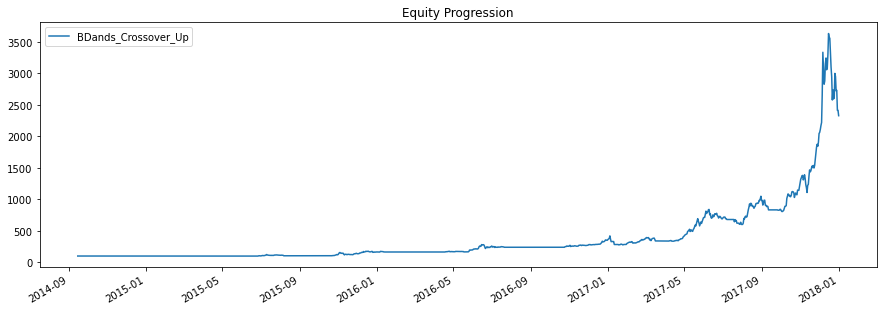

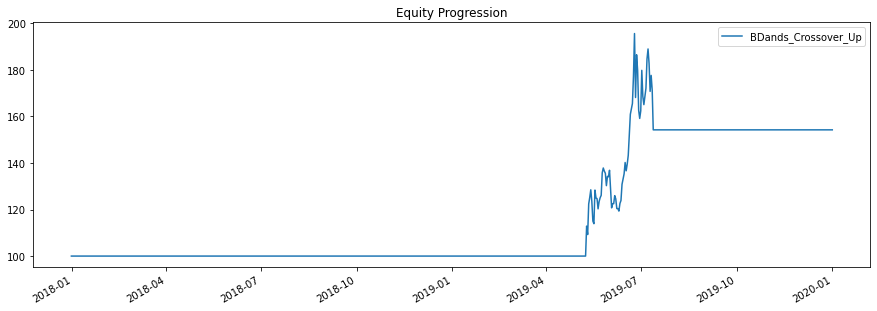

In [14]:
bbands_result_dict['0.8_1.0_100_strategy'].plot()
final_boll_run.plot()
plt.show()

In [15]:
strategy_df = bt.merge(final_boll_run.prices, bbands_result_dict['0.8_1.0_100_strategy'].prices)


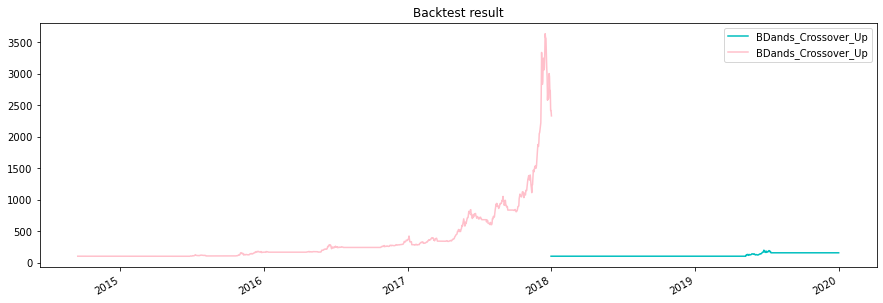

In [16]:
strategy_df.plot(title='Backtest result', color=['c','pink'], figsize=(15,5))
plt.legend()
plt.show()

In [17]:
strategy_df.head()

,BDands_Crossover_Up,BDands_Crossover_Up
2014-09-15,NaN,100.0
2014-09-16,NaN,100.0
2014-09-17,NaN,100.0
2014-09-18,NaN,100.0
2014-09-19,NaN,100.0


In [18]:
sentiment_data = pd.read_excel('./datasets/crypto_sentiment_analysis.xlsx')

In [19]:
sentiment_data = sentiment_data.set_index('Date')
sentiment_data



,score,polarity,subjectivity,btcusd
Date,,,,
2014-09-16,13730,0.227196,0.411736,457.334015
2014-09-17,1124,0.088481,0.473790,424.440002
2014-09-18,1394,0.080334,0.466357,394.795990
2014-09-19,1483,0.082671,0.475161,408.903992
2014-09-20,1011,0.092784,0.467507,398.821014
...,...,...,...,...
2019-12-27,908,0.084943,0.480118,7290.088379
2019-12-28,790,0.080727,0.460008,7317.990234
2019-12-29,920,0.077322,0.469056,7422.652832


In [20]:
bbands_optimization_dataframe = pd.DataFrame(bbands_result_dict.items(), columns=['bband_strategy_name','output'])

In [21]:
bbands_optimization_dataframe = bbands_optimization_dataframe.set_index('bband_strategy_name')

In [22]:
bbands_optimization_dataframe

,output
bband_strategy_name,
0.8_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
0.9_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.0_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.1_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.2_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
...,...
1.5_1.8999999999999997_195_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.5999999999999999_1.8999999999999997_195_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.6999999999999997_1.8999999999999997_195_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...


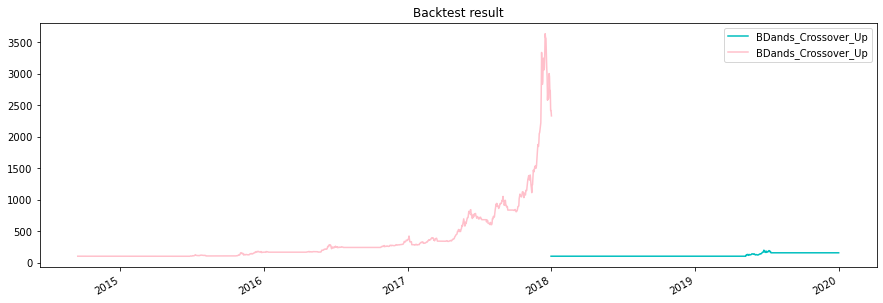

In [23]:
strategy_df.plot(title='Backtest result', color=['c','pink'], figsize=(15,5))
plt.legend()
plt.show()

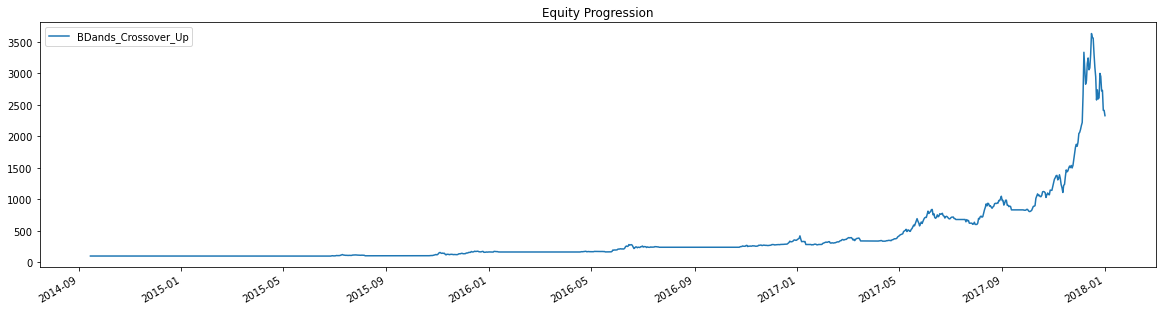

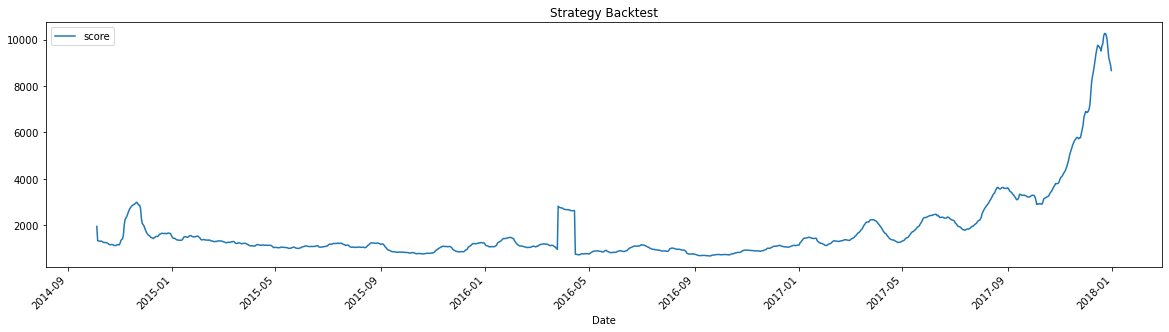

In [24]:
bbands_result_dict['0.8_1.0_100_strategy'].plot(figsize=(20,5))
plt.plot()
plt.show()
sentiment_data.loc[train_start:train_end,'score'].rolling(20).mean().plot(kind = 'line', y='score', rot=45,figsize=(20,5)) # 
# plt.axvline(x='2020-03-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2020-05-03', color='grey', linestyle='--')
plt.title('Strategy Backtest')
# plt.ylabel('index')
plt.legend()
plt.show()
# plt.savefig('./assets/HW_1_1.png') # saving figures
# plt.show()

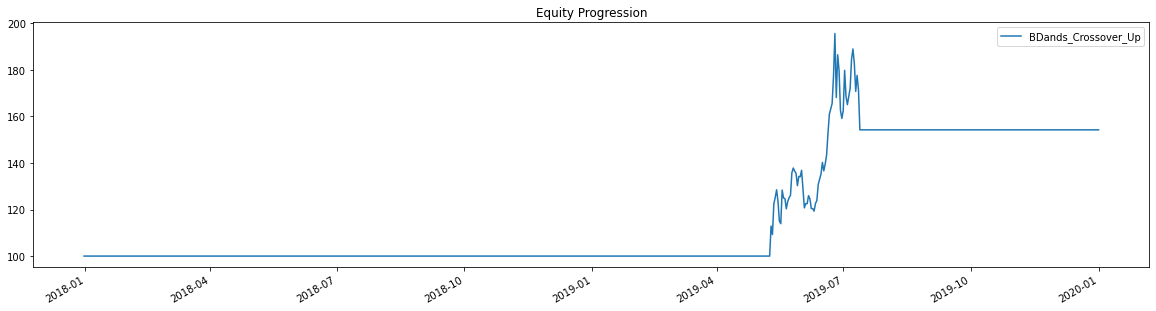

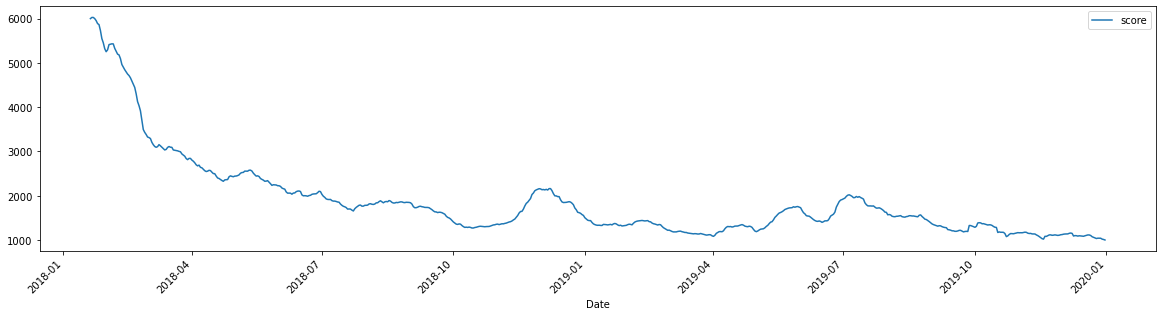

In [25]:
final_boll_run.plot(figsize=(20,5))
plt.plot()
plt.show()
sentiment_data.loc[test_start:test_end,'score'].rolling(20).mean().plot(kind = 'line', y='score', rot=45,figsize=(20,5)) # 
# plt.axvline(x='2020-03-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2020-05-03', color='grey', linestyle='--')
# plt.title('Strategy Backtest')
# plt.ylabel('index')
plt.legend()
plt.show()
# plt.savefig('./assets/HW_1_1.png') # saving figures
# plt.show()

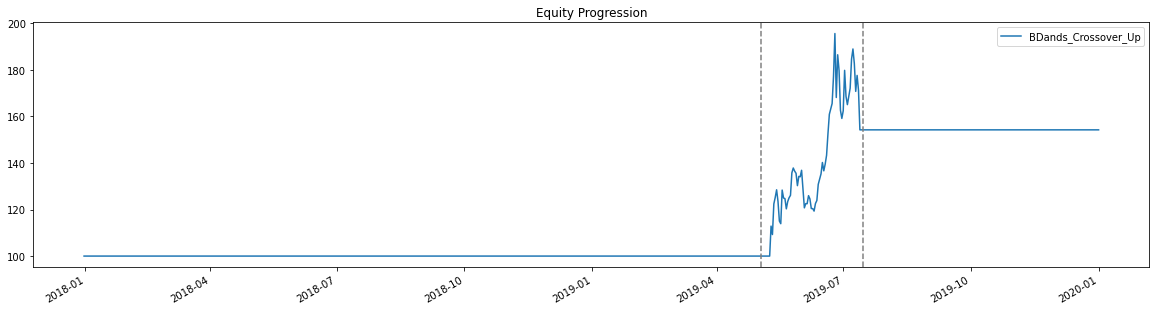

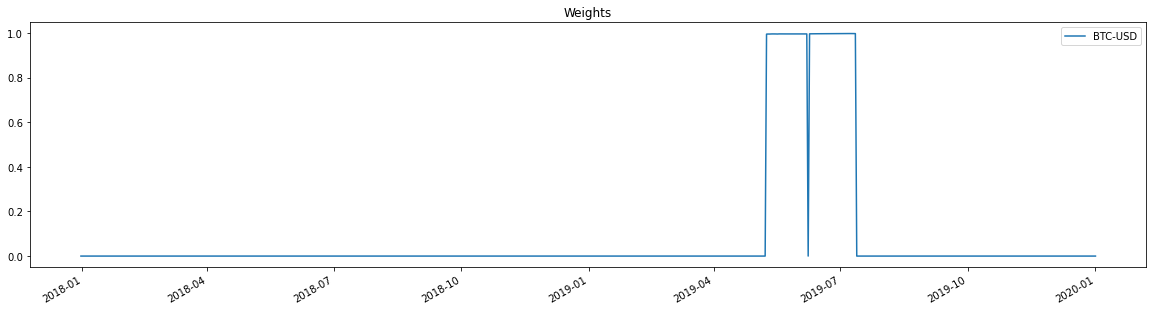

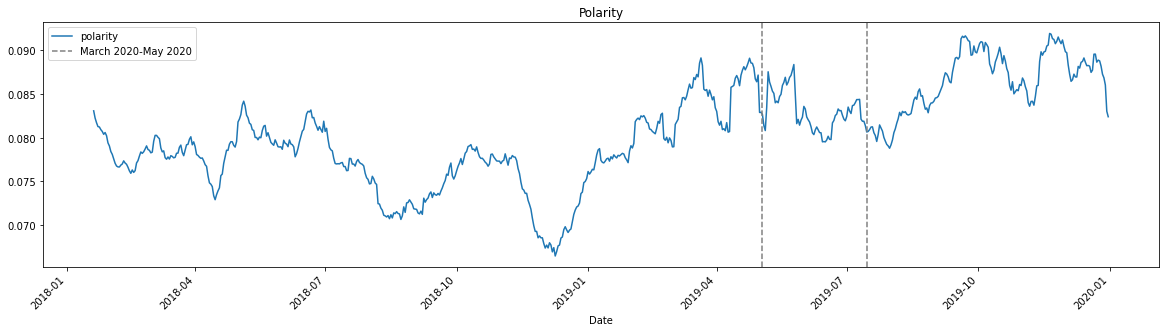

KeyError: 'btcusd'

In [26]:
final_boll_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.show()


final_boll_run.plot_security_weights(figsize=(20,5))
# plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-05-15', color='grey', linestyle='--')
# plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.title('Weights')
plt.legend()
plt.show()

sentiment_data.loc[test_start:test_end,'polarity'].rolling(20).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()


test_data.rolling(20).mean().plot(kind = 'line', y='btcusd', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.show()

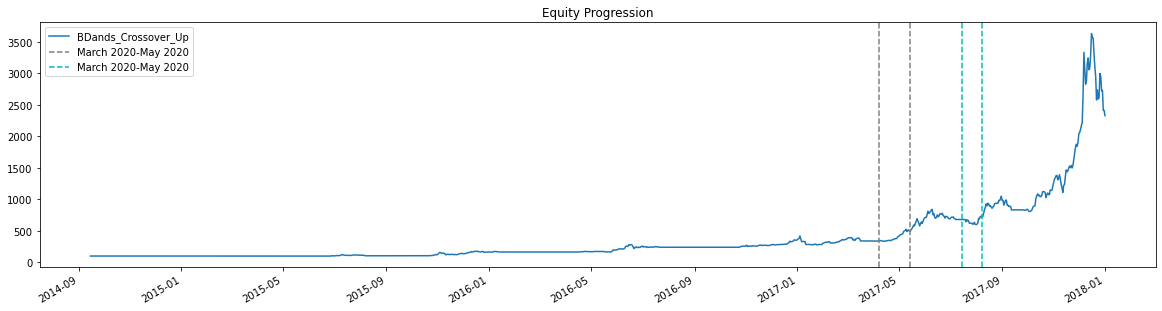

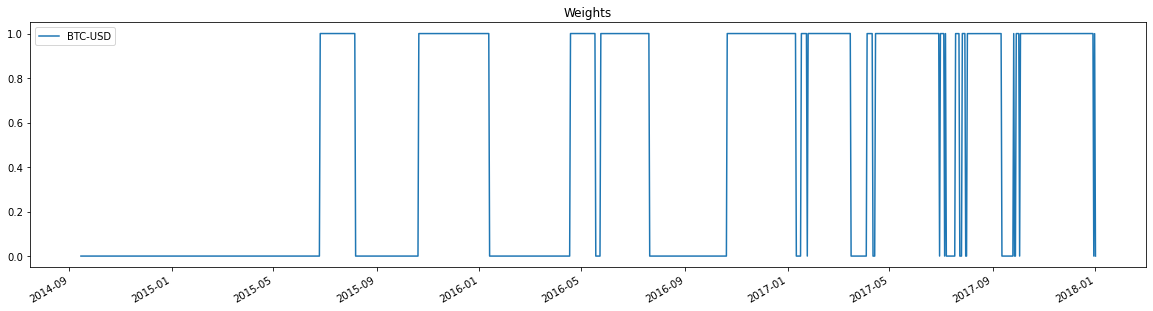

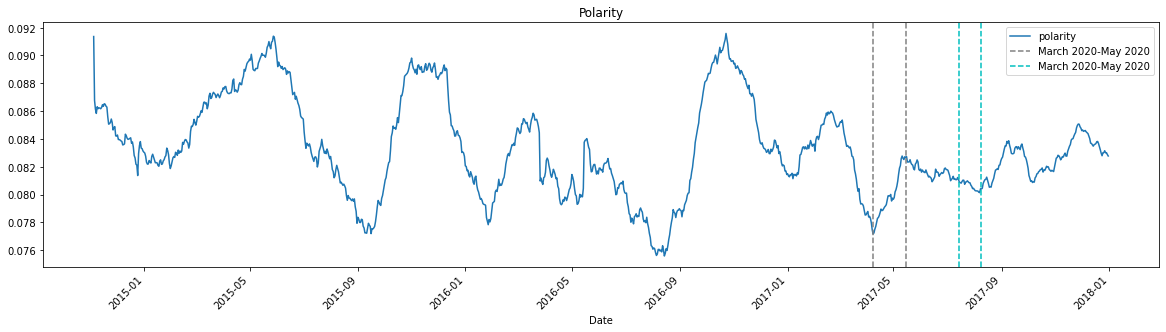

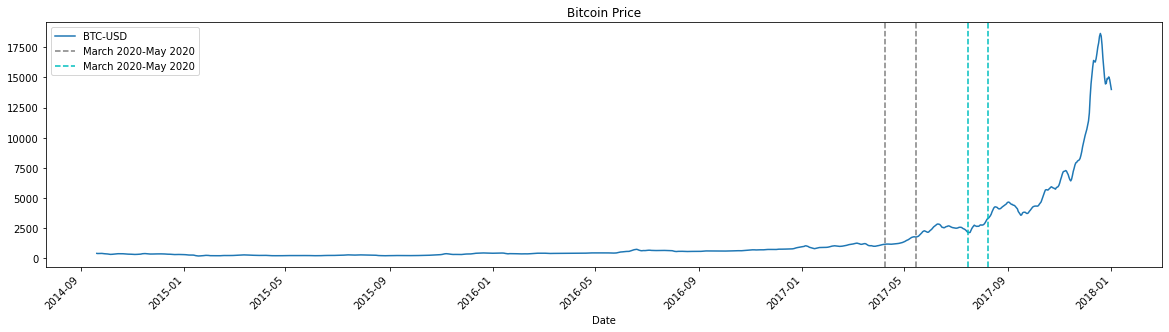

In [27]:
bbands_result_dict['0.8_1.0_100_strategy'].plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()

bbands_result_dict['0.8_1.0_100_strategy'].plot_security_weights(figsize=(20,5))
# plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-05-15', color='grey', linestyle='--')
# plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.title('Weights')
plt.legend()
plt.show()


sentiment_data.loc[train_start:train_end,'polarity'].rolling(50).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()


train_data.rolling(5).mean().plot(kind = 'line', y='BTC-USD', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.legend()
plt.show()

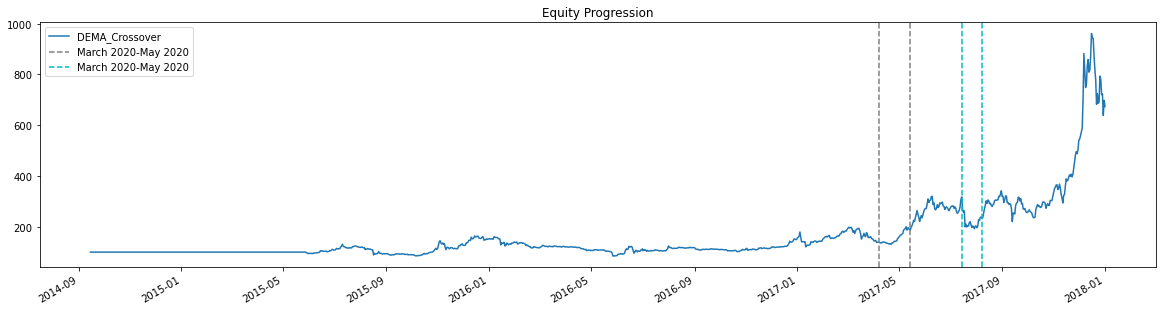

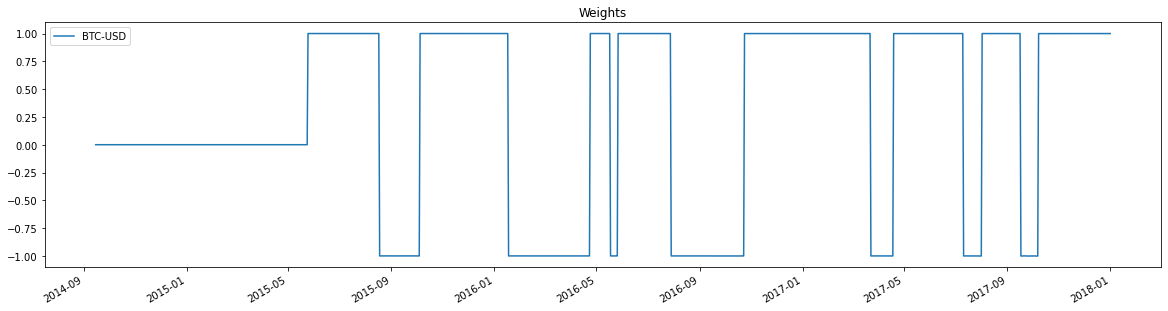

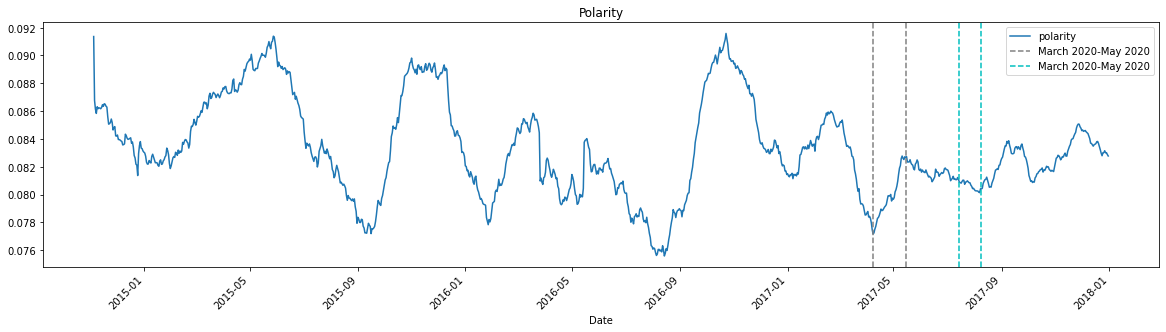

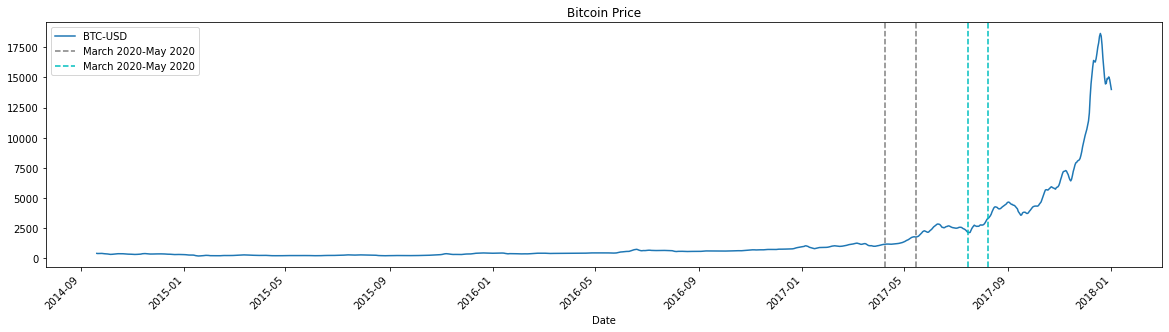

In [28]:
train_dema_run.plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()

train_dema_run.plot_security_weights(figsize=(20,5))
# plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-05-15', color='grey', linestyle='--')
# plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.title('Weights')
plt.legend()
plt.show()

sentiment_data.loc[train_start:train_end,'polarity'].rolling(50).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()

train_data.rolling(5).mean().plot(kind = 'line', y='BTC-USD', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.legend()
plt.show()

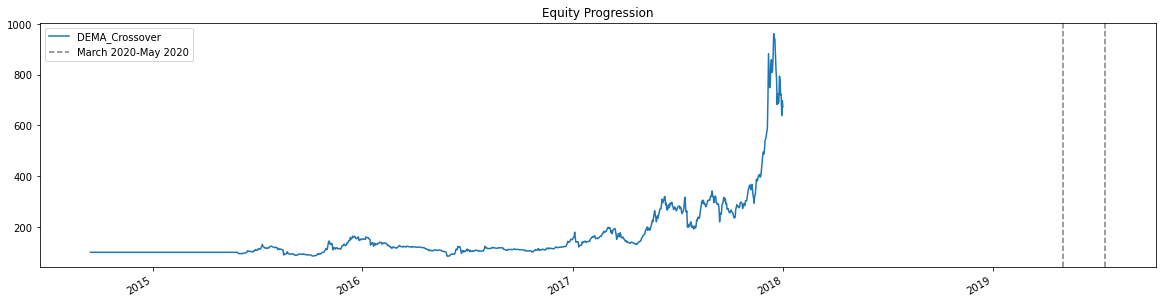

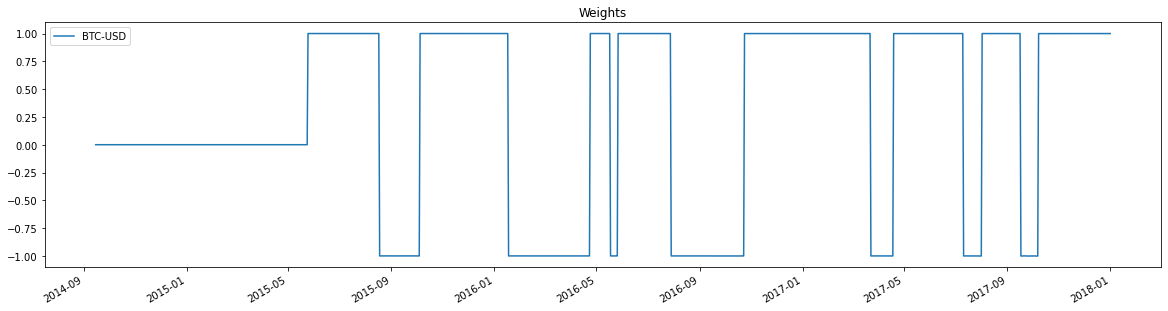

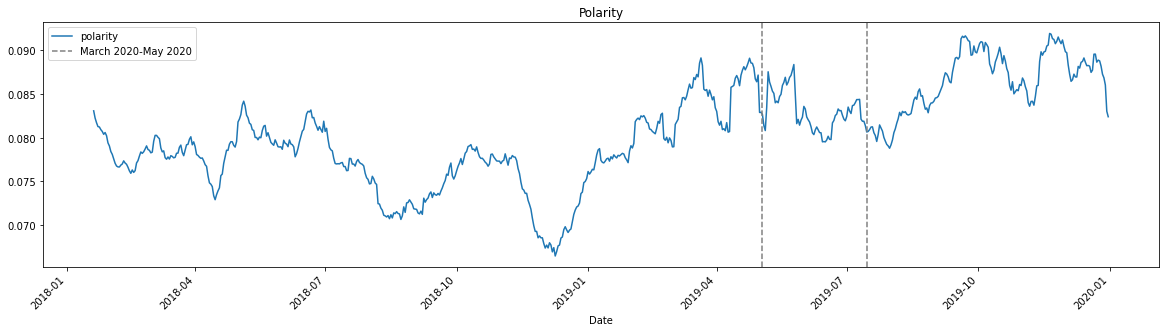

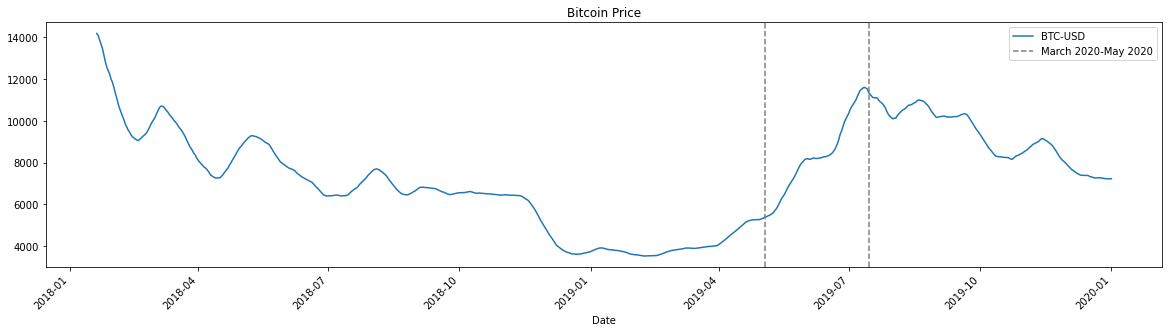

In [29]:
test_dema_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.legend()
plt.show()


test_dema_run.plot_security_weights(figsize=(20,5))
# plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-05-15', color='grey', linestyle='--')
# plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.title('Weights')
plt.legend()
plt.show()

sentiment_data.loc[test_start:test_end,'polarity'].rolling(20).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()


test_data.rolling(20).mean().plot(kind = 'line', y='BTC-USD', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.legend()
plt.show()

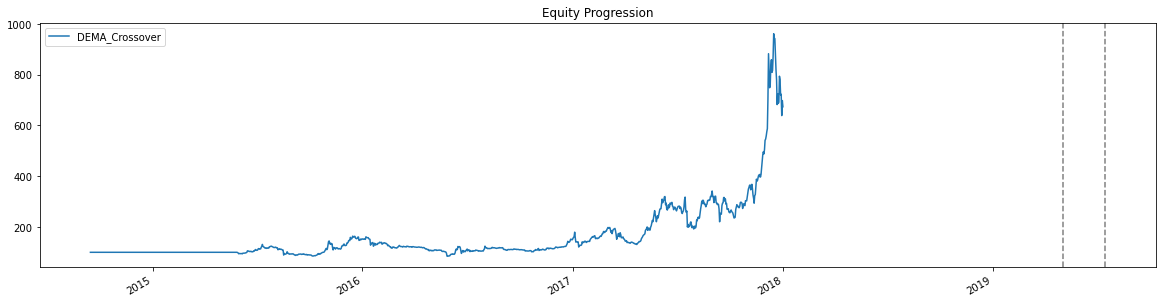

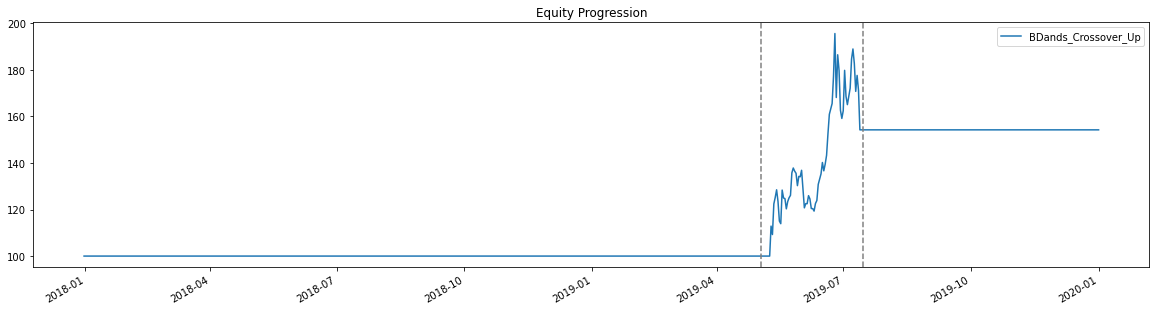

In [30]:
test_dema_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.show()

final_boll_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.show()

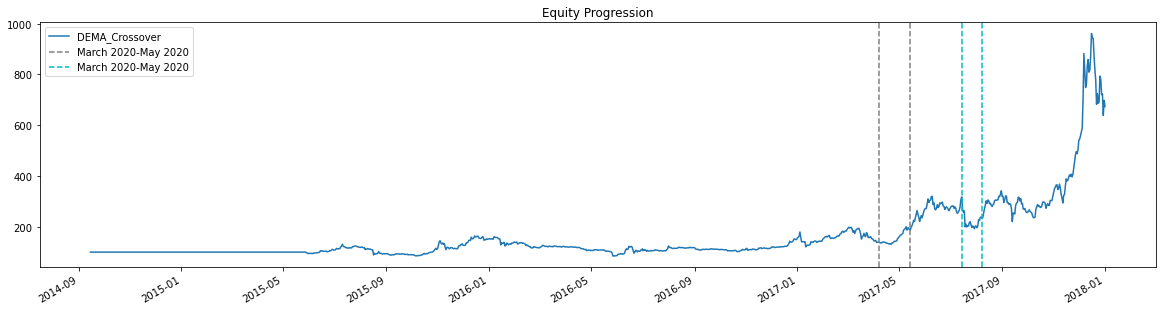

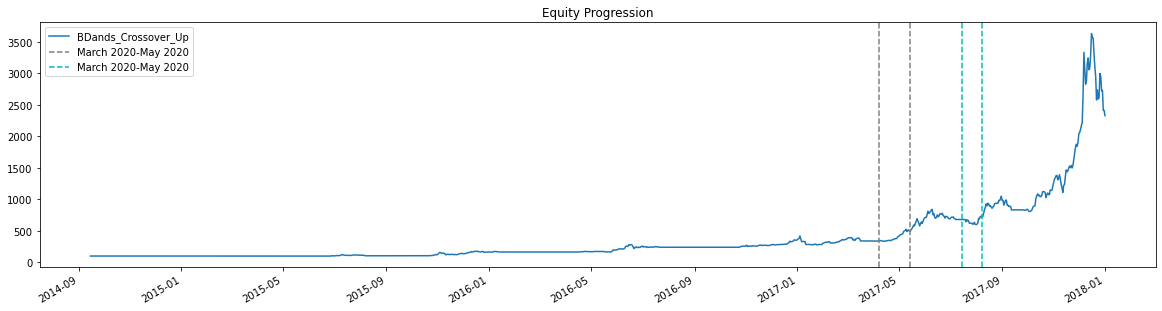

In [31]:
train_dema_run.plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()

bbands_result_dict['0.8_1.0_100_strategy'].plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Equity Progression'}>

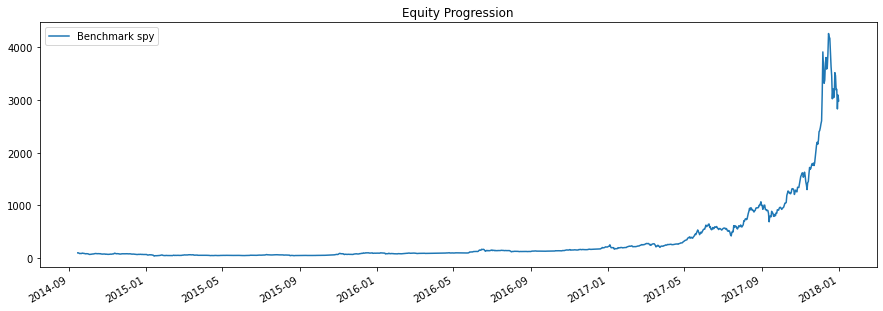

In [32]:
# train Benchmark
btc_data=bt.get('btc-usd ', start=train_start, end= train_end)
long_only_ew = bt.Strategy('Benchmark spy', [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
test_benchmark = bt.Backtest(long_only_ew, btc_data)
res_benchmark = bt.run(test_benchmark)

#strategies' results and benchmark
train_bench=bt.run(test_benchmark)


train_bench.plot()

<AxesSubplot:title={'center':'Equity Progression'}>

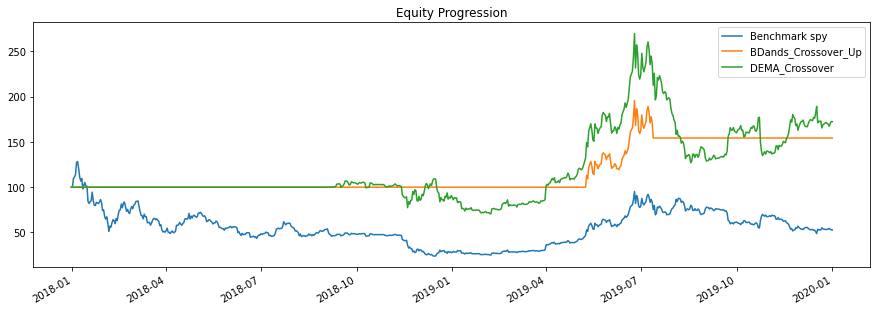

In [33]:
# train Benchmark
btc_data=bt.get('btc-usd ', start=test_start, end= test_end)
long_only_ew = bt.Strategy('Benchmark spy', [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
test_benchmark = bt.Backtest(long_only_ew, btc_data)
res_benchmark = bt.run(test_benchmark)

#strategies' results and benchmark
test_bench = bt.run(test_benchmark, backtest_bbands, test_dema_backtest)


test_bench.plot()

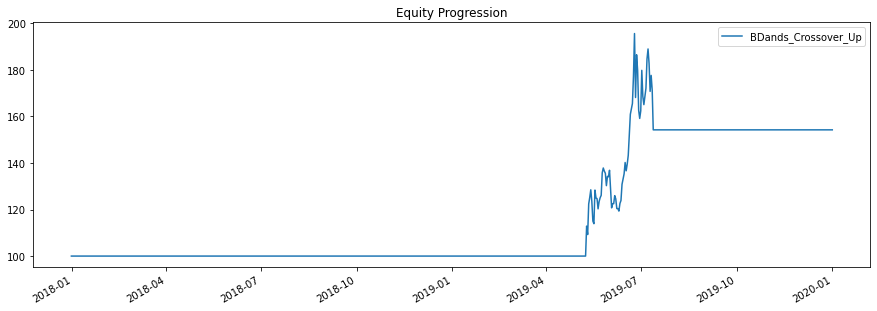

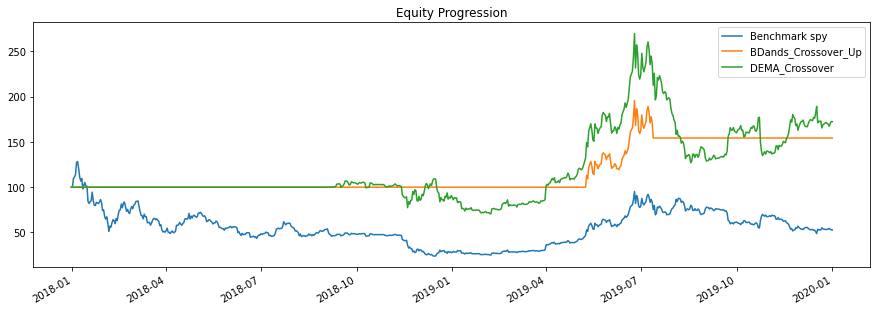

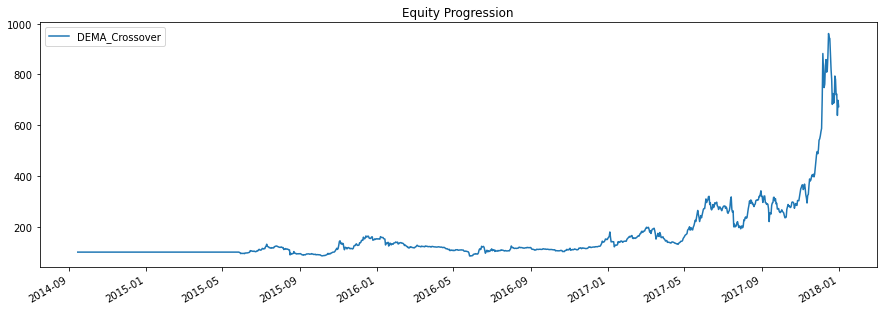

In [34]:
final_boll_run.plot()
test_bench.plot()
test_dema_run.plot()
plt.show()

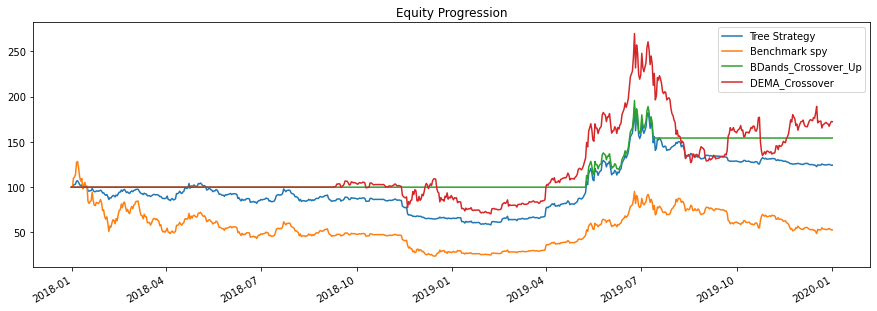

In [35]:


# create the momentum strategy - we will specify the children (3rd argument)
# to limit the universe the strategy can choose from
mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                              ['BTC-USD'])


new_mom_s = bt.Strategy('z_mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                              [mom_s])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other other 2 are Strategies.
master = bt.Strategy('Tree Strategy', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                                [dema_crossover, mom_s, bbands])

# create the backtest and run it
test = bt.Backtest(master, test_data)
# create results so we can display and plot
results = bt.run(test)
test_bench = bt.run(test, test_benchmark, backtest_bbands, test_dema_backtest)


test_bench.plot()


# results.display()
# results.plot_security_weights()
plt.savefig('final_graphs')


In [36]:
# create the momentum strategy - we will specify the children (3rd argument)
# to limit the universe the strategy can choose from
mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                              ['BTC-USD'])


new_mom_s = bt.Strategy('z_mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                              [mom_s])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other other 2 are Strategies.
master = bt.Strategy('Tree Strategy', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                                [dema_crossover, mom_s, bbands])

# create the backtest and run it
test = bt.Backtest(master, test_data)
# create results so we can display and plot
results = bt.run(test)
test_bench = bt.run(test)

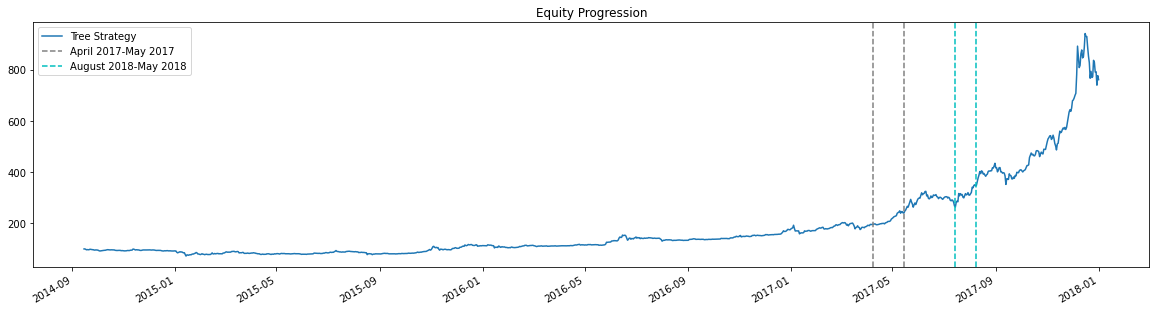

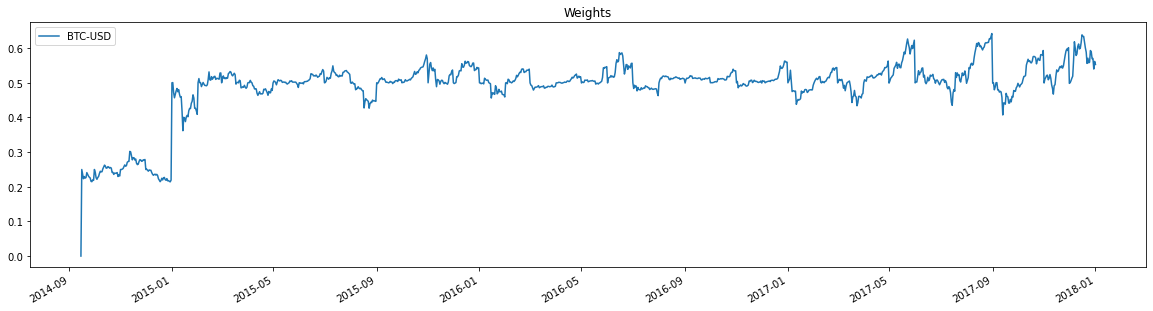

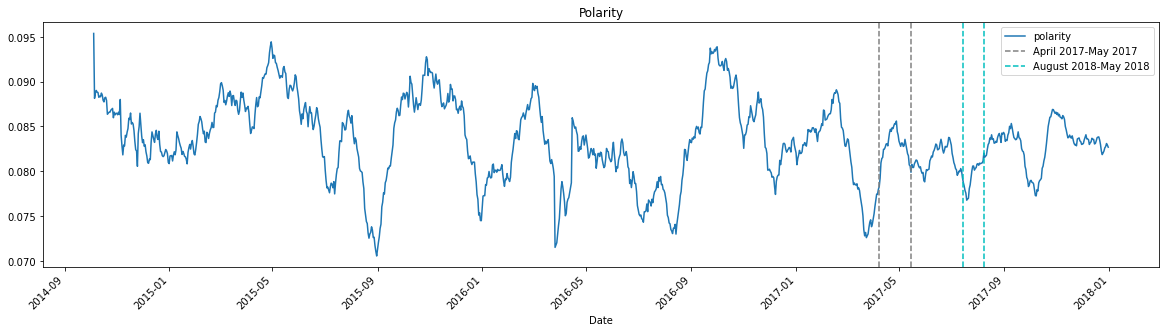

In [37]:
# create the backtest and run it
train_bt = bt.Backtest(master, train_data)
# create results so we can display and plot
train_results = bt.run(train_bt)
train_bench = bt.run(train_bt)


train_bench.plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='April 2017-May 2017') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='August 2018-May 2018') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.legend()
plt.plot()
plt.show()


train_bench.plot_security_weights(figsize=(20,5))


plt.title('Weights')
# plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.legend()
plt.show()

sentiment_data.loc[train_start:train_end,'polarity'].rolling(20).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='April 2017-May 2017') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='August 2018-May 2018') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()
# results.display()
# results.plot_security_weights()
# plt.savefig('final_graphs')

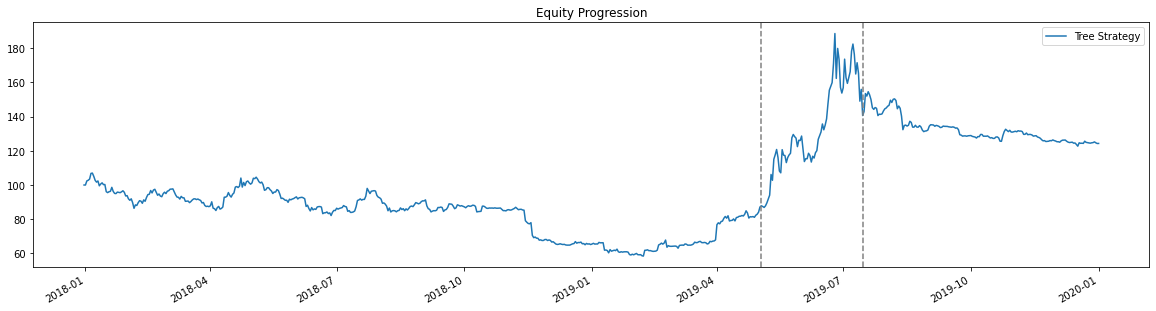

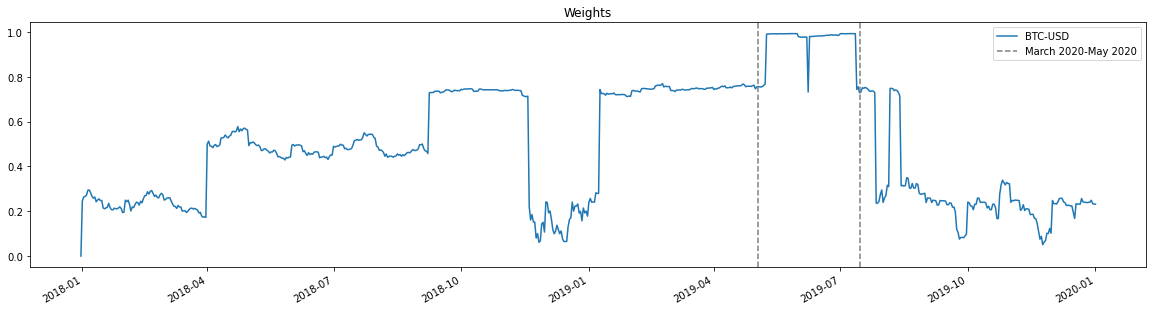

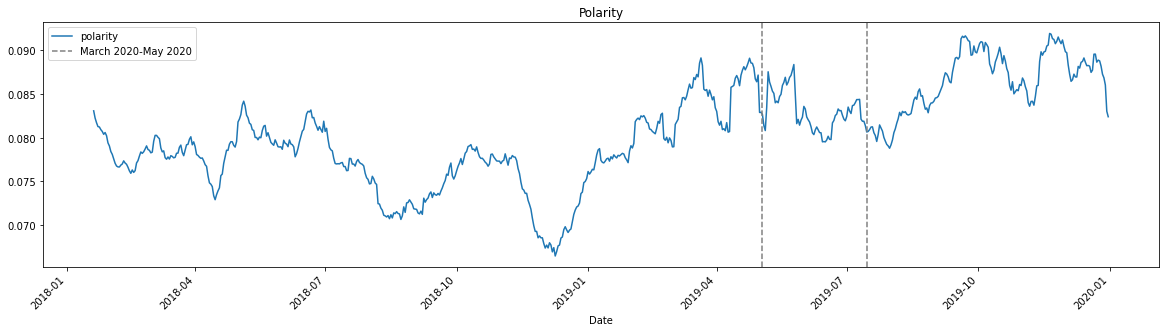

In [38]:



test_bench.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.show()
test_bench.plot_security_weights(figsize=(20,5))


plt.title('Weights')
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.legend()
plt.show()

sentiment_data.loc[test_start:test_end,'polarity'].rolling(20).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()
# results.display()
# results.plot_security_weights()
# plt.savefig('final_graphs')

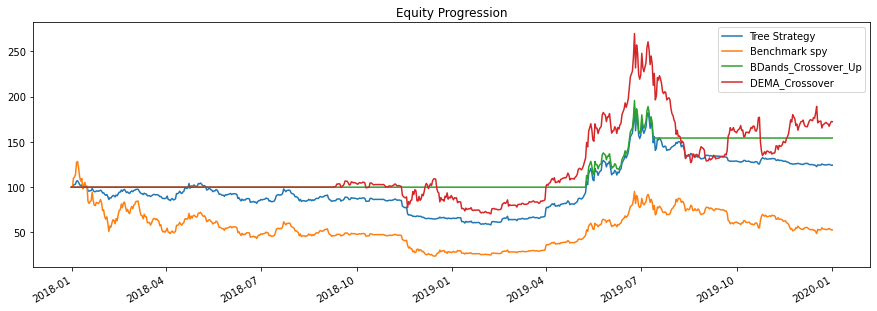

In [39]:


# create the momentum strategy - we will specify the children (3rd argument)
# to limit the universe the strategy can choose from
mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                              ['BTC-USD'])


new_mom_s = bt.Strategy('z_mom_s', [bt.algos.RunWeekly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                              ['BTC-USD'])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other other 2 are Strategies.
master = bt.Strategy('Tree Strategy', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                                [dema_crossover, mom_s, bbands])

# create the backtest and run it
test = bt.Backtest(master, test_data)
# create results so we can display and plot
results = bt.run(test)
test_bench = bt.run(test, test_benchmark, backtest_bbands, test_dema_backtest)


test_bench.plot()


# results.display()
# results.plot_security_weights()
plt.savefig('final_graphs')


In [40]:
test_bench.lookback_returns

,Tree Strategy,Benchmark spy,BDands_Crossover_Up,DEMA_Crossover
mtd,0.000212,0.000909,0.000000,-0.000915
3m,-0.035835,-0.141428,0.000000,0.076707
6m,-0.207612,-0.332147,-0.050382,-0.229946
ytd,0.000212,0.000909,0.000000,-0.000915
1y,0.896921,0.864015,0.542599,0.950142
3y,0.114766,-0.272767,0.241830,0.312489
5y,NaN,NaN,NaN,NaN
10y,NaN,NaN,NaN,NaN
incep,0.114766,-0.272767,0.241830,0.312489


In [41]:
test_bench.stats

,Tree Strategy,Benchmark spy,BDands_Crossover_Up,DEMA_Crossover
start,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00
end,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
rf,0,0,0,0
total_return,0.242887,-0.471363,0.542599,0.723268
cagr,0.114766,-0.272767,0.24183,0.312489
max_drawdown,-0.453347,-0.813404,-0.211602,-0.528728
calmar,0.253152,-0.33534,1.14285,0.59102
mtd,0.000211655,0.0009088,0,-0.000914891
three_month,-0.0358347,-0.141428,0,0.0767072
six_month,-0.207612,-0.332147,-0.0503822,-0.229946


In [117]:
DEMA_optimized_returns = pd.DataFrame(index=fast_range,columns=slow_range)

In [118]:
for fast in fast_range:
    for slow in slow_range:
        DEMA_optimized_returns.loc[fast,slow] = float(strat_dict[f'{fast}_{slow}_strategy'].stats.loc['total_return',])

In [119]:
DEMA_optimized_returns

,90,91,92,93,94,95,96,97,98,99,...,120,121,122,123,124,125,126,127,128,129
20,1.27017,1.17607,1.4177,1.47574,1.37805,1.70724,1.80433,1.79974,2.07699,1.91295,...,2.66242,2.56502,2.60815,2.96485,2.86554,2.96493,3.39778,3.38801,3.60485,3.83784
21,1.18951,1.15956,1.69157,1.78713,1.72033,1.26732,1.24025,1.20017,1.20114,1.12148,...,2.32138,2.43095,2.47262,2.4593,2.63681,2.69133,2.75677,2.7832,3.19611,3.41144
22,1.58449,1.61296,2.18481,1.2018,1.1487,1.35078,1.24401,1.32582,1.28165,1.10562,...,2.43136,2.44408,2.48362,2.46985,2.37659,2.21348,2.36216,2.59612,2.70194,3.74099
23,1.85829,1.6533,1.20129,1.05037,0.900368,1.1332,1.10615,1.08029,1.30966,1.17452,...,2.18452,2.25399,2.93616,3.23685,3.64599,3.49769,3.60659,3.60449,3.68892,4.27324
24,0.750097,0.588769,0.928776,0.847402,0.805064,1.03507,0.928895,0.887367,0.955313,1.02171,...,3.79685,3.72581,3.93343,3.7707,3.14164,3.47019,3.33159,2.99107,3.0603,3.25066
25,0.682808,0.614089,1.01033,0.996618,0.900174,1.02415,0.995303,1.74743,1.65422,1.39297,...,3.38478,3.39897,3.18211,3.22111,3.05941,2.96155,2.9205,2.86609,2.96071,3.74309
26,0.847792,0.889081,1.05205,1.75906,1.78678,2.04988,1.96498,1.69231,1.91342,1.70529,...,3.00506,2.97641,3.0305,3.01588,3.16763,3.183,3.6866,3.84914,3.86407,4.21933
27,1.50296,1.51629,1.85667,2.07568,2.07747,2.11402,2.10394,1.69185,1.6237,1.80084,...,3.11236,2.97641,3.0305,3.68594,3.5625,4.18983,4.2725,4.23269,4.32681,4.32722
28,1.24523,1.19001,1.4619,1.91356,1.85619,2.00528,2.4039,2.17284,2.62244,1.47348,...,3.75314,3.81152,4.13814,4.19215,3.99943,3.94828,5.73496,5.72319,5.38261,4.88823
29,1.33711,1.14686,1.76007,1.85868,1.73147,1.62288,2.5529,1.50247,1.59526,1.89922,...,4.16461,4.12343,5.65532,5.62836,5.46096,5.01119,4.83494,4.67032,4.41152,4.46559


In [99]:
optimized_returns.loc[fast,slow]

nan

In [125]:
for fast in fast_range:
    for slow in slow_range:
        DEMA_optimized_returns.loc[fast,slow] = float(strat_dict[f'{fast}_{slow}_strategy'].stats.loc['total_return',])

In [131]:
BBAND_optimized_returns = pd.DataFrame()

In [132]:
for nbup in nbdevup_range:
    for t_time in t_bbands_range:
        BBAND_optimized_returns.loc[nbup,t_time] = float(bbands_result_dict[f'0.8_{nbup}_{t_time}_strategy'].stats.loc['total_return',])

In [143]:
BBAND_optimized_returns

,60,65,70,75,80,85,90,95,100,105,...,150,155,160,165,170,175,180,185,190,195
0.8,11.975841,13.576052,17.009343,18.883942,21.471040,18.096268,20.745221,20.267498,16.253173,11.825639,...,21.455892,18.613068,19.869323,15.364822,16.537921,15.581400,15.842389,18.778589,17.929867,17.672964
0.9,12.649039,11.250278,9.983954,13.006811,13.978154,18.983750,20.293008,20.521170,20.893308,21.289757,...,11.868325,11.826574,12.494083,15.512976,18.393326,19.663759,16.454391,14.475867,14.010474,14.338515
1.0,14.703879,11.392071,13.734446,10.754916,11.398674,12.871922,13.983675,18.533007,22.282566,20.221310,...,12.508877,12.468280,11.294997,11.811689,11.240530,10.869376,12.358954,18.696220,17.535689,17.181068
1.1,11.859493,13.783774,12.772377,11.238551,10.381095,9.324402,11.346610,11.552235,12.026475,14.233602,...,10.815345,10.693673,10.555719,10.950641,10.649972,11.169445,10.746845,10.431774,9.080929,8.891067
1.2,10.139895,10.908250,11.123959,11.516075,12.031120,12.643281,11.329958,10.374510,10.921996,10.894390,...,16.047501,16.620933,12.414668,10.625249,9.437151,9.721898,9.382326,9.342649,9.695662,9.830964
1.3,14.082703,10.010958,8.395587,10.756834,12.280481,14.134347,14.208177,13.983722,9.511443,9.301887,...,13.122077,14.272597,14.760933,16.402301,14.914448,15.023436,11.988020,9.762278,9.121982,8.561677
1.4,13.209393,13.179906,12.077323,9.582029,10.314839,12.492747,11.868303,13.561069,12.495571,13.281460,...,8.560992,8.850356,11.884751,12.624341,10.283636,12.262258,12.742546,13.233142,13.163710,11.963727
1.5,15.793608,11.994246,13.955911,10.915818,8.107976,8.068629,7.670782,8.719187,10.299547,11.625072,...,7.437434,7.110564,7.650427,7.222475,7.203509,7.737136,11.321688,9.637616,11.102020,11.524688
1.6,15.796427,16.229377,13.367101,11.252737,10.320344,9.050981,7.244068,7.402445,6.567702,5.767564,...,7.991694,6.982287,6.310255,6.551810,6.512939,7.222308,7.425235,7.725382,8.525219,9.226304
1.7,13.597679,12.939554,12.754947,11.264822,10.318825,9.941703,9.166933,7.098598,6.194343,6.581468,...,9.327930,8.072295,7.798744,7.849627,6.979228,6.788621,6.837528,7.163449,6.449859,6.178010


In [232]:
for col in DEMA_optimized_returns.columns:
    DEMA_optimized_returns[col] = DEMA_optimized_returns[col].astype(float)

for col in BBAND_optimized_returns.columns:
    BBAND_optimized_returns[col] = BBAND_optimized_returns[col].astype(float)
    

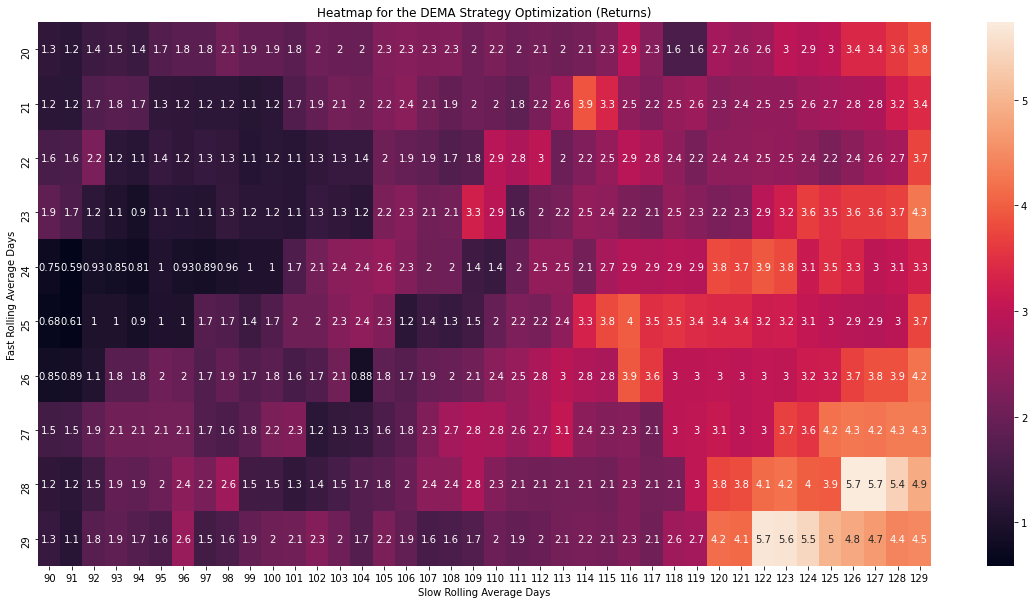

In [231]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(DEMA_optimized_returns, annot=True)
plt.title('Heatmap for the DEMA Strategy Optimization (Returns)')
plt.ylabel('Fast Rolling Average Days')
plt.xlabel('Slow Rolling Average Days')
plt.show()

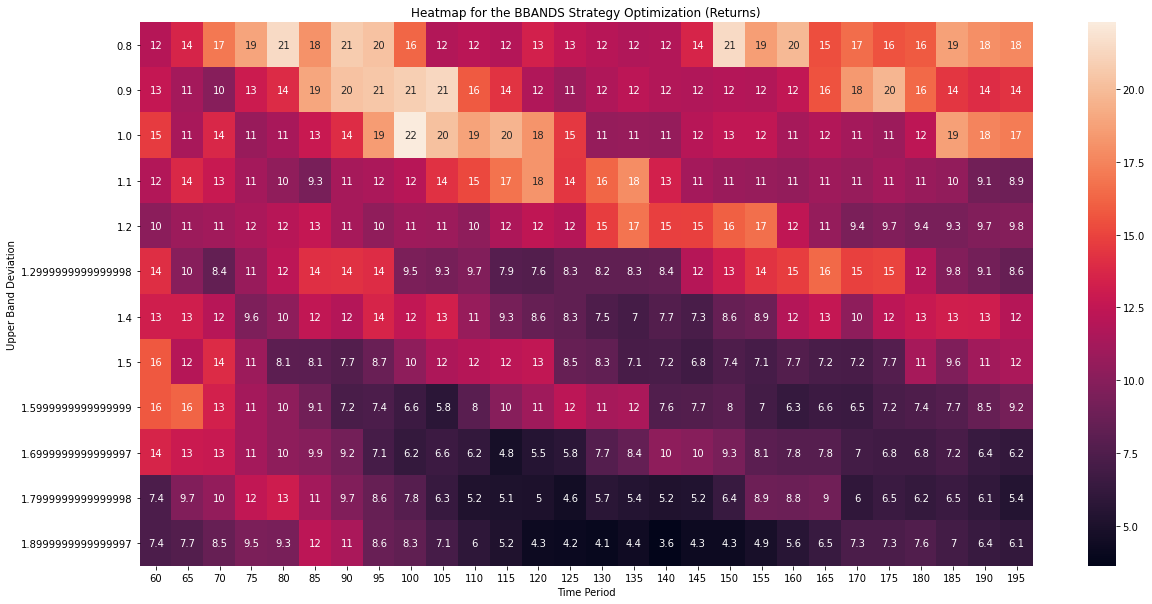

In [234]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(BBAND_optimized_returns, annot=True)
plt.title('Heatmap for the BBANDS Strategy Optimization (Returns)')
plt.ylabel('Upper Band Deviation')
plt.xlabel('Time Period')
plt.show()

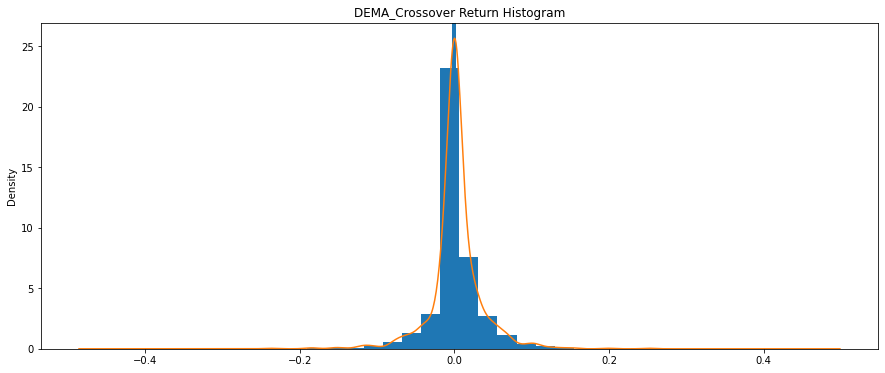

In [239]:
test_dema_run.plot_histogram(figsize=(15,6))

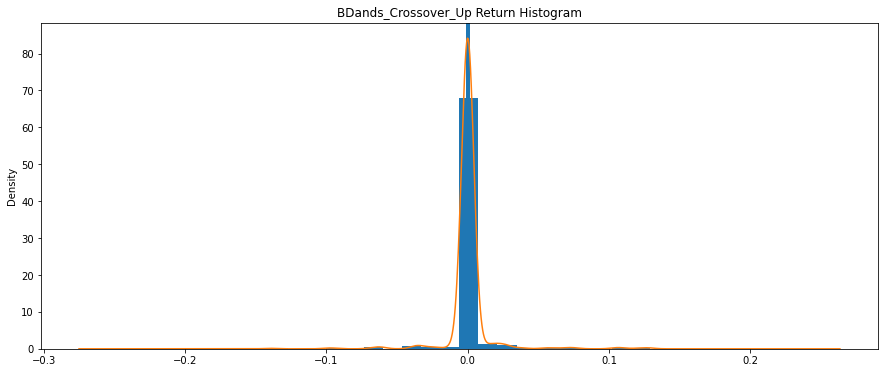

In [246]:
final_boll_run.plot_histogram(figsize=(15,6))